In [1]:
import os
import random
import numpy as np

import plotly
import plotly.graph_objs as go
import plotly.subplots as sp

from colors import colors
from functions import *

import project_paths as pp

from IPython.display import *
import ipywidgets as widgets

In [2]:
with open(os.path.join(pp.datasets_folder_path, 'words.txt')) as file:
    words = file.read().splitlines()

In [5]:
np.random.seed(200)
random.seed(200)

vocab_size = 100
vocab = sorted(random.sample(words, vocab_size))


original_logits = np.random.normal(0, 0.01, size=vocab_size)
sorted_indices = np.argsort(-original_logits)
original_logits = original_logits[sorted_indices]

original_pmf = convert_logits_to_probabilities(original_logits)

max_entropy = np.nansum(-original_pmf * np.log2(original_pmf))
p_cumsum = []
entropies = []
entropies_percent = []
for i in range(vocab_size):
    effective_logits = select_top_k(original_logits, i + 1)
    effective_pmf = convert_logits_to_probabilities(effective_logits)
    p_cumsum.append(np.nansum(original_pmf[:i + 1]))
    entropy = np.nansum(-effective_pmf * np.log2(effective_pmf))
    entropies.append(entropy)
    entropies_percent.append(entropy / max_entropy)

p_cumsum = np.array(p_cumsum)
entropies = np.array(entropies)
entropies_percent = np.array(entropies_percent)

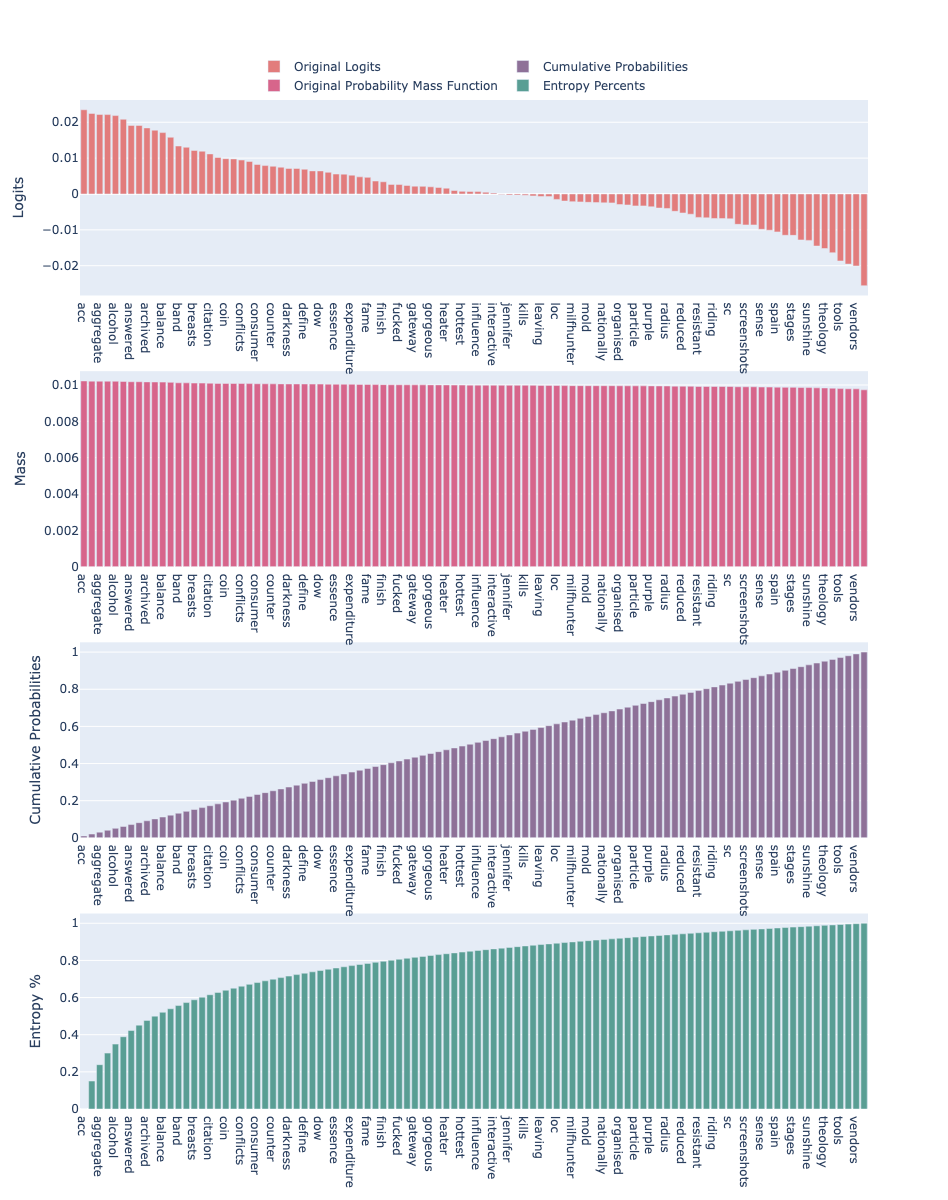

In [6]:
fig = sp.make_subplots(rows=4, cols=1)

# Adding original logits trace
fig.add_trace(
    go.Bar(
        x=vocab,
        y=original_logits,
        name='Original Logits',
        marker={
            'color': f"rgba{*colors['original_logits'], 1}"
        },
        legendgroup='original'
    ), row=1, col=1
)
fig.update_yaxes(title_text='Logits', row=1, col=1)

# Adding original PMF trace
fig.add_trace(
    go.Bar(
        x=vocab,
        y=original_pmf,
        name='Original Probability Mass Function',
        marker={
            'color': f"rgba{*colors['original_pmf'], 1}"
        },
        legendgroup='original'
    ), row=2, col=1
)
fig.update_yaxes(title_text='Mass', row=2, col=1)

# Adding p_cumsum trace
fig.add_trace(
    go.Bar(
        x=vocab,
        y=p_cumsum,
        name='Cumulative Probabilities',
        marker={
            'color': f"rgba{*colors['effective_logits'], 1}"
        },
        legendgroup='effective'
    ), row=3, col=1,
)
fig.update_yaxes(title_text='Cumulative Probabilities', row=3, col=1)

# Adding entropy % trace
fig.add_trace(
    go.Bar(
        x=vocab,
        y=entropies_percent,
        name='Entropy Percents',
        marker={
            'color': f"rgba{*colors['effective_pmf'], 1}"
        },
        legendgroup='effective'
    ), row=4, col=1,
)
fig.update_yaxes(title_text='Entropy %', row=4, col=1)

fig.update_layout(
    showlegend=True,
    legend=dict(
        x=0.5,
        y=1.0,
        xanchor='center',
        yanchor='bottom',
        orientation='h'
    ),
    width=600,
    height=1200
)
fig.show()